In [175]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns

import sys
import os

In [176]:
df = pd.read_csv('../data/raw/data_real_sa_domesticcurrency.csv')
rename = {
    'Unnamed: 0' : 'country',
    'Unnamed: 1' : 'variable',
}
    
df = df.rename(columns=rename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 122 entries, country to Q4 2022
dtypes: object(122)
memory usage: 19.2+ KB


In [177]:
df

,country,variable,Q1 1993,Q2 1993,Q3 1993,Q4 1993,Q1 1994,Q2 1994,Q3 1994,Q4 1994,...,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022
0,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"31,923.10","30,289.70","34,119.90","35,268.10","38,325.00","37,292.20","37,340.30","38,129.60","37,280.40","40,527.90"
1,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"156,211.10","163,799.80","169,338.40","167,878.10","173,911.20","178,083.00","179,692.90","181,142.20","183,669.90","180,841.30"
2,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"28,132.20","31,838.60","34,162.60","33,612.90","34,220.80","36,490.80","37,731.50","39,996.30","39,346.20","36,517.20"
3,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"32,900.10","37,417.60","38,426.50","40,642.40","41,792.70","45,776.00","48,784.90","50,062.30","50,521.60","46,190.50"
4,Argentina,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"104,822.50","110,690.20","113,628.50","115,301.90","118,153.20","122,020.80","126,693.30","128,801.10","129,959.40","127,966.00"
5,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"115,902.45","119,822.12","122,595.59","126,659.48","129,908.70","130,821.11","137,782.38","140,234.19","140,206.11","143,784.76"
6,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"382,826.27","380,194.06","382,011.49","391,247.37","402,601.15","406,326.98","406,854.74","411,049.16","412,682.20","412,142.12"
7,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"74,286.06","74,738.88","77,655.63","80,426.36","82,961.18","85,378.68","88,306.48","89,246.07","89,416.68","91,175.76"
8,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"106,676.03","114,026.30","118,031.52","119,249.78","123,220.39","129,947.24","135,245.28","137,297.22","140,673.39","138,337.39"
9,Italy,"National Accounts, Expenditure, Gross Domestic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"227,971.85","221,227.58","216,782.33","226,181.21","235,396.00","236,565.32","233,939.98","239,000.03","244,202.10","240,282.57"


In [178]:
# annual population in levels and logs
df_pop = pd.read_csv('../data/raw/mexico_population.csv')
df_pop.columns = ['DATE', 'pop']
df_pop['DATE'] = pd.to_datetime(df_pop['DATE'])
df_pop['Y'] = df_pop.DATE.apply(lambda x : x.year)
df_pop = df_pop[['pop', 'Y']]
df_pop['pop_tp1'] = df_pop['pop'].shift(-1)
df_pop['log_pop'] = np.log(df_pop['pop'])
df_pop['log_pop_tp1'] = np.log(df_pop['pop_tp1'])
df_pop

,pop,Y,pop_tp1,log_pop,log_pop_tp1
0,36268055,1960,37439317.0,17.406448,17.438232
1,37439317,1961,38683283.0,17.438232,17.470918
2,38683283,1962,39982118.0,17.470918,17.503943
3,39982118,1963,41333878.0,17.503943,17.537193
4,41333878,1964,42737991.0,17.537193,17.570599
...,...,...,...,...,...
58,124013861,2018,125085311.0,18.635904,18.644507
59,125085311,2019,125998302.0,18.644507,18.651779
60,125998302,2020,126705138.0,18.651779,18.657373
61,126705138,2021,127504125.0,18.657373,18.663659


In [179]:
# quarterly levels population, computed by linearly interpolating the log level of annual population counts
YQ = pd.DataFrame()
YQ['date'] = pd.date_range('1960-01-01', '2022-01-01', freq='Q')
YQ['Y'] = YQ['date'].apply(lambda x : x.year)
YQ['Q'] = YQ['date'].apply(lambda x : x.quarter)
YQ = YQ.drop(columns='date')
YQ

,Y,Q
0,1960,1
1,1960,2
2,1960,3
3,1960,4
4,1961,1
...,...,...
243,2020,4
244,2021,1
245,2021,2
246,2021,3


In [180]:
df_pop = df_pop.merge(YQ, on='Y', how='outer')
df_pop['Qm1'] = df_pop['Q'] - 1
df_pop['log_pop_interpolated'] = (
    df_pop['log_pop']*(1 - df_pop['Qm1']/4) 
    + df_pop['log_pop_tp1']*df_pop['Qm1']/4
    )
df_pop['pop_interpolated'] = np.exp(df_pop['log_pop_interpolated'])
df_pop = df_pop[['Y', 'Q', 'pop_interpolated']]
df_pop = df_pop.rename(columns={'pop_interpolated':'population'})
df_pop = df_pop.dropna()
df_pop['Q'] = df_pop['Q'].astype('int')
df_pop

,Y,Q,population
0,1960,1,3.626806e+07
1,1960,2,3.655739e+07
2,1960,3,3.684903e+07
3,1960,4,3.714300e+07
4,1961,1,3.743932e+07
...,...,...,...
243,2020,4,1.265281e+08
244,2021,1,1.267051e+08
245,2021,2,1.269044e+08
246,2021,3,1.271040e+08


<Axes: >

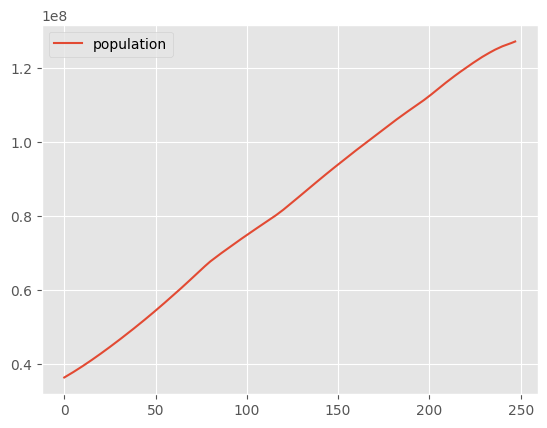

In [181]:
df_pop.plot(y=['population'])

In [182]:
# raw names for variables
unique_names = df.variable.unique()
print(unique_names)

['National Accounts, Expenditure, Gross Domestic Product, Exports of Goods and Services, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, Gross Capital Formation, Gross Fixed Capital Formation, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, External Balance of Goods and Services, Imports of Goods and Services, Real, Seasonally Adjusted, Domestic Currency'
 'National Accounts, Expenditure, Gross Domestic Product, Final Consumption Expenditure, Private Sector (Households and Non-profit Institutions Serving Households), Real, Seasonally Adjusted, Domestic Currency']


In [183]:
# collect names
idExports = unique_names[['Exports' in name for name in unique_names]][0]
idCapital = unique_names[['Capital' in name for name in unique_names]][0]
idImports = unique_names[['Imports' in name for name in unique_names]][0]
idConsumption = unique_names[['Consumption' in name for name in unique_names]][0]
idGDP = unique_names[['Gross Domestic Product, Real' in name for name in unique_names]][0]

rename = {
    idExports:'Exports',
    idCapital:'Investment',
    idImports:'Imports',
    idConsumption:'Consumption',
    idGDP:'GDP'}
df['variable'] = df['variable'].map(rename)

In [184]:
df = df.query("country == 'Mexico'")
df

,country,variable,Q1 1993,Q2 1993,Q3 1993,Q4 1993,Q1 1994,Q2 1994,Q3 1994,Q4 1994,...,Q3 2020,Q4 2020,Q1 2021,Q2 2021,Q3 2021,Q4 2021,Q1 2022,Q2 2022,Q3 2022,Q4 2022
10,Mexico,Exports,"357,560.80","367,273.20","373,421.60","389,414.60","397,014.20","396,298.70","405,280.90","420,269.00",...,"1,698,485.90","1,701,135.10","1,654,666.90","1,680,475.70","1,689,969.10","1,778,926.00","1,822,787.70","1,843,196.50","1,875,762.00","1,781,731.90"
11,Mexico,GDP,"2,516,478.50","2,523,185.10","2,548,959.80","2,582,673.90","2,609,049.20","2,663,879.10","2,684,423.00","2,715,658.30",...,"4,242,295.40","4,425,479.00","4,443,929.40","4,475,675.70","4,424,962.50","4,476,192.00","4,528,582.50","4,577,604.70","4,619,060.70","4,640,091.30"
12,Mexico,Investment,"518,833.30","520,778.80","532,107.20","572,297.80","605,161.00","623,780.90","624,178.80","605,683.20",...,"724,079.20","762,024.30","795,134.90","804,622.80","825,928.50","820,679.20","840,196.60","855,621.90","859,549.50","885,659.20"
13,Mexico,Imports,"372,632.00","391,449.30","395,695.00","418,023.30","444,393.50","457,645.60","471,688.80","483,256.60",...,"1,425,209.00","1,595,150.00","1,686,681.00","1,682,624.70","1,716,333.00","1,755,828.40","1,796,457.80","1,879,799.00","1,909,721.30","1,860,471.20"
14,Mexico,Consumption,"1,562,821.00","1,577,824.10","1,574,110.90","1,598,525.90","1,606,205.60","1,660,252.00","1,684,663.70","1,695,355.80",...,"2,759,598.60","2,918,849.20","2,965,984.70","3,006,894.80","3,010,283.60","3,082,032.10","3,171,733.10","3,199,451.70","3,207,898.50","3,224,893.90"


In [185]:
df = df.melt(id_vars=['country', 'variable'],
                var_name='Date',
                value_name='Value')
df = (df.pivot(index=['country', 'Date'], columns='variable', values='Value')
       .reset_index()
)
df

variable,country,Date,Consumption,Exports,GDP,Imports,Investment
0,Mexico,Q1 1993,"1,562,821.00","357,560.80","2,516,478.50","372,632.00","518,833.30"
1,Mexico,Q1 1994,"1,606,205.60","397,014.20","2,609,049.20","444,393.50","605,161.00"
2,Mexico,Q1 1995,"1,577,205.70","445,781.60","2,559,375.90","371,907.50","420,182.60"
3,Mexico,Q1 1996,"1,596,424.20","549,934.90","2,595,954.50","429,944.00","429,340.70"
4,Mexico,Q1 1997,"1,696,862.40","590,550.00","2,759,869.70","499,551.30","500,864.50"
...,...,...,...,...,...,...,...
115,Mexico,Q4 2018,"3,112,470.00","1,700,649.50","4,636,254.50","1,752,655.70","908,301.90"
116,Mexico,Q4 2019,"3,141,116.20","1,650,100.20","4,607,595.50","1,675,217.20","870,319.60"
117,Mexico,Q4 2020,"2,918,849.20","1,701,135.10","4,425,479.00","1,595,150.00","762,024.30"
118,Mexico,Q4 2021,"3,082,032.10","1,778,926.00","4,476,192.00","1,755,828.40","820,679.20"


In [186]:
df['Date'] = df['Date'].astype('str')
df['country'] = df['country'].astype('str')

tofloat = ['Consumption', 'Exports', 'GDP', 'Imports', 'Investment']
for var in tofloat:
    df[var] = df[var].str.replace(',', '').astype('float64')

df['Q'] = df.Date.str[1:2] #[df[1:2] for df in df.Date]
df['Y'] = df.Date.str[-4:] #[df[-4:] for df in df.Date]
time = [Y + "-Q" + Q for Y, Q in zip(df.Y, df.Q)]

df['time'] = pd.to_datetime(time)
df['Y'] = df['Y'].astype('int')
df['Q'] = df['Q'].astype('int')

df = df.sort_values(by=['country', 'Y', 'Q'])
df

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_22630/1273343389.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(time)


variable,country,Date,Consumption,Exports,GDP,Imports,Investment,Q,Y,time
0,Mexico,Q1 1993,1562821.0,357560.8,2516478.5,372632.0,518833.3,1,1993,1993-01-01
30,Mexico,Q2 1993,1577824.1,367273.2,2523185.1,391449.3,520778.8,2,1993,1993-04-01
60,Mexico,Q3 1993,1574110.9,373421.6,2548959.8,395695.0,532107.2,3,1993,1993-07-01
90,Mexico,Q4 1993,1598525.9,389414.6,2582673.9,418023.3,572297.8,4,1993,1993-10-01
1,Mexico,Q1 1994,1606205.6,397014.2,2609049.2,444393.5,605161.0,1,1994,1994-01-01
...,...,...,...,...,...,...,...,...,...,...
118,Mexico,Q4 2021,3082032.1,1778926.0,4476192.0,1755828.4,820679.2,4,2021,2021-10-01
29,Mexico,Q1 2022,3171733.1,1822787.7,4528582.5,1796457.8,840196.6,1,2022,2022-01-01
59,Mexico,Q2 2022,3199451.7,1843196.5,4577604.7,1879799.0,855621.9,2,2022,2022-04-01
89,Mexico,Q3 2022,3207898.5,1875762.0,4619060.7,1909721.3,859549.5,3,2022,2022-07-01


In [187]:
rename = {
    'Consumption':'C',
    'Exports':'X',
    'Imports':'M',
    'Investment':'I'
}
df = df.rename(columns = rename)

In [188]:
df

variable,country,Date,C,X,GDP,M,I,Q,Y,time
0,Mexico,Q1 1993,1562821.0,357560.8,2516478.5,372632.0,518833.3,1,1993,1993-01-01
30,Mexico,Q2 1993,1577824.1,367273.2,2523185.1,391449.3,520778.8,2,1993,1993-04-01
60,Mexico,Q3 1993,1574110.9,373421.6,2548959.8,395695.0,532107.2,3,1993,1993-07-01
90,Mexico,Q4 1993,1598525.9,389414.6,2582673.9,418023.3,572297.8,4,1993,1993-10-01
1,Mexico,Q1 1994,1606205.6,397014.2,2609049.2,444393.5,605161.0,1,1994,1994-01-01
...,...,...,...,...,...,...,...,...,...,...
118,Mexico,Q4 2021,3082032.1,1778926.0,4476192.0,1755828.4,820679.2,4,2021,2021-10-01
29,Mexico,Q1 2022,3171733.1,1822787.7,4528582.5,1796457.8,840196.6,1,2022,2022-01-01
59,Mexico,Q2 2022,3199451.7,1843196.5,4577604.7,1879799.0,855621.9,2,2022,2022-04-01
89,Mexico,Q3 2022,3207898.5,1875762.0,4619060.7,1909721.3,859549.5,3,2022,2022-07-01


In [189]:
# merge with population; use inner merge to only keep observations from main df
df = df.merge(df_pop, how='inner', on=['Y', 'Q'])
df

,country,Date,C,X,GDP,M,I,Q,Y,time,population
0,Mexico,Q1 1993,1562821.0,357560.8,2516478.5,372632.0,518833.3,1,1993,1993-01-01,8.664845e+07
1,Mexico,Q2 1993,1577824.1,367273.2,2523185.1,391449.3,520778.8,2,1993,1993-04-01,8.706197e+07
2,Mexico,Q3 1993,1574110.9,373421.6,2548959.8,395695.0,532107.2,3,1993,1993-07-01,8.747747e+07
3,Mexico,Q4 1993,1598525.9,389414.6,2582673.9,418023.3,572297.8,4,1993,1993-10-01,8.789495e+07
4,Mexico,Q1 1994,1606205.6,397014.2,2609049.2,444393.5,605161.0,1,1994,1994-01-01,8.831442e+07
...,...,...,...,...,...,...,...,...,...,...,...
111,Mexico,Q4 2020,2918849.2,1701135.1,4425479.0,1595150.0,762024.3,4,2020,2020-10-01,1.265281e+08
112,Mexico,Q1 2021,2965984.7,1654666.9,4443929.4,1686681.0,795134.9,1,2021,2021-01-01,1.267051e+08
113,Mexico,Q2 2021,3006894.8,1680475.7,4475675.7,1682624.7,804622.8,2,2021,2021-04-01,1.269044e+08
114,Mexico,Q3 2021,3010283.6,1689969.1,4424962.5,1716333.0,825928.5,3,2021,2021-07-01,1.271040e+08


In [190]:
# formulate variables in per capita terms by dividing by population
to_percapita = ['C', 'X', 'M', 'GDP', 'I']
for var in to_percapita:
    df[var] = df[var] / df['population']

In [191]:
# defining new variables

# trade balance - exports minus imports
df['TB'] = df['X'] - df['M']

# trade balance to GDP ratio
df['TBGDP'] = df['TB'] / df['GDP']

# investment to GDP ratio
df['IGDP'] = df['I']  / df['GDP']

In [192]:
# convert to log levels to remove exponential growth
tolog = ['C', 'GDP', 'I', 'X', 'M']
for var in tolog:
    df['log_' + var] = np.log(df[var])

In [193]:
# compute growth rate as the four period quarter over quarter percentage change
def growth(x):
    x_growth = np.log(x).diff(4) 
    return x_growth
df = df.sort_values(by=['country', 'Y', 'Q'])    
togrowth = ['C', 'GDP', 'I']
for var in togrowth:
    df[var + '_growth'] = df.groupby(by='country')[var].transform(growth)

In [194]:
import statsmodels.api as sm
def linear_cycle(y):
    y = np.log(y)
    x = np.ones((len(y), 2))
    x[:, 0] = 1
    x[:, 1] = np.arange(len(y))

    model = sm.OLS(y, x).fit()
    trend = model.predict(x)
    cycle = y - trend
    return cycle

from statsmodels.tsa.filters.hp_filter import hpfilter
def get_cycle(x):
    x = np.log(x)
    cycle = np.ones_like(x)
    cycle[np.isnan(x)] = np.nan
    cycle[~np.isnan(x)] = hpfilter(x[~np.isnan(x)])[0]
    return cycle

## HP Filtered Cyclical Components

In [195]:
tohp = ['GDP', 'C', 'I', 'TBGDP']
hpcycles = []

for var in tohp:
    df[var + '_cycle'] = df.groupby(by='country')[var].transform(get_cycle)
    hpcycles.append(var + '_cycle')

/Users/mitch/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Linear Cyclical Components

In [196]:
tolinear = ['GDP', 'C', 'I', 'TBGDP']
linear_cycles = []
for var in tolinear:
    df[var + '_linear_cycle'] = df.groupby(by='country')[var].transform(linear_cycle)
    linear_cycles.append(var + '_linear_cycle')

/Users/mitch/envs/main/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [197]:
ymax = 1996
crisis = pd.to_datetime('1995Q2')
opt_crisis = {'linewidth':2, 'color':'red', 'alpha':0.5}
drange = pd.date_range('1993', '1996', freq='YS')
mexico = df.copy().query("country == 'Mexico'").query('Y <= @ymax')

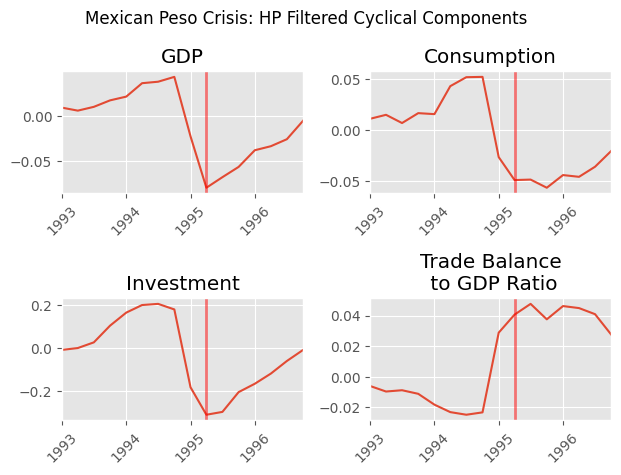

In [198]:
fig = plt.figure()

plt.suptitle('Mexican Peso Crisis: HP Filtered Cyclical Components')

ax = plt.subplot(221)
ax.plot(mexico['time'], mexico['GDP_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(mexico['time'], mexico['C_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(mexico['time'], mexico['I_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(mexico['time'], mexico['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

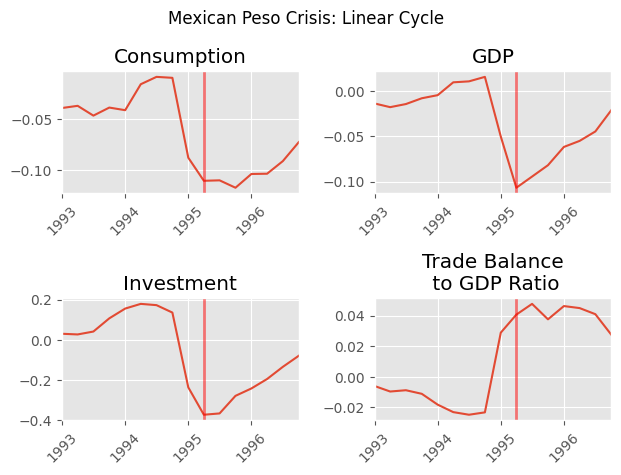

In [199]:
fig = plt.figure()

plt.suptitle('Mexican Peso Crisis: Linear Cycle')

ax = plt.subplot(221)
ax.plot(mexico['time'], mexico['C_linear_cycle'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(mexico['time'], mexico['GDP_linear_cycle'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(mexico['time'], mexico['I_linear_cycle'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(mexico['time'], mexico['TBGDP'])
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

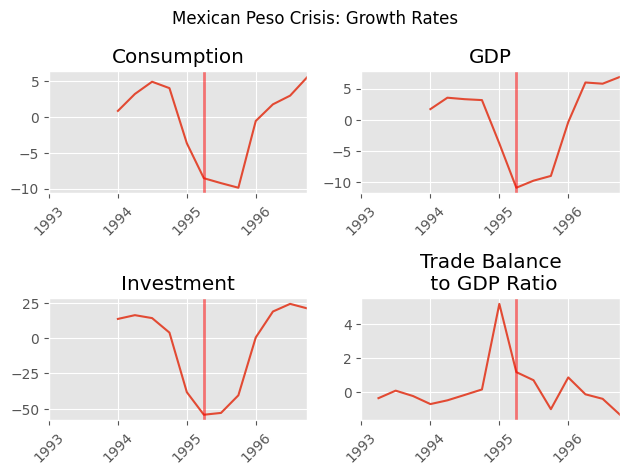

In [200]:
fig = plt.figure()

plt.suptitle('Mexican Peso Crisis: Growth Rates')

ax = plt.subplot(221)
ax.plot(mexico['time'], 100*mexico['C_growth'])
ax.set_title('Consumption')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(222)
ax.plot(mexico['time'], 100*mexico['GDP_growth'])
ax.set_title('GDP')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(223)
ax.plot(mexico['time'], 100*mexico['I_growth'])
ax.set_title('Investment')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax = plt.subplot(224)
ax.plot(mexico['time'], 100*mexico['TBGDP'].diff(1))
ax.set_title('Trade Balance\n to GDP Ratio')
ax.set_xmargin(0)
ax.axvline(crisis, **opt_crisis)
ax.set_xticks(drange)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

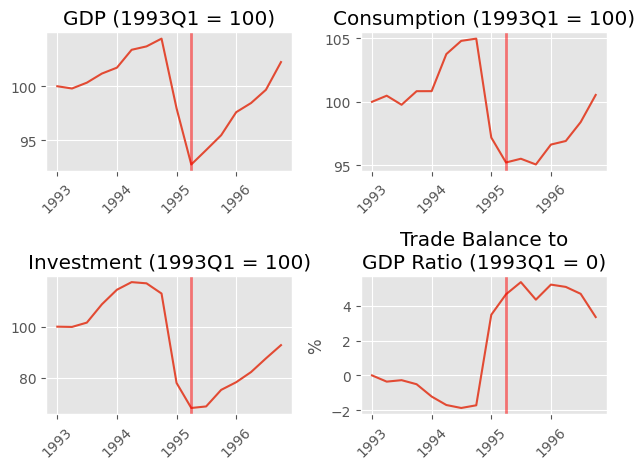

In [201]:
from matplotlib.ticker import MaxNLocator

focus = df.query("country == 'Mexico'").query('Y <= @ymax')
norm_period = pd.to_datetime('1993Q1')
focus= focus.set_index('time', drop=False)
normlabel = ' (1993Q1 = 100)'

plt.clf()
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(focus['time'], 100 *focus['GDP'] / focus['GDP'][norm_period])
ax.set_title('GDP' + normlabel)
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)

ax = fig.add_subplot(222)
ax.plot(focus['time'], 100 *focus['C'] / focus['C'][norm_period])
ax.set_title('Consumption' + normlabel)
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)
#ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks(np.arange(95, 110, 5))

ax = fig.add_subplot(223)
ax.plot(focus['time'], 100 *focus['I'] / focus['I'][norm_period])
ax.set_title('Investment' + normlabel)
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)

ax = fig.add_subplot(224)
ax.plot(focus['time'], 100 *(focus['TBGDP'] - focus['TBGDP'][norm_period]))
ax.set_title('Trade Balance to\nGDP Ratio (1993Q1 = 0)')
ax.set_xticks(drange)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.axvline(crisis, **opt_crisis)
ax.set_ylabel('%')

plt.tight_layout()

# Business Cycle Moments

<Axes: >

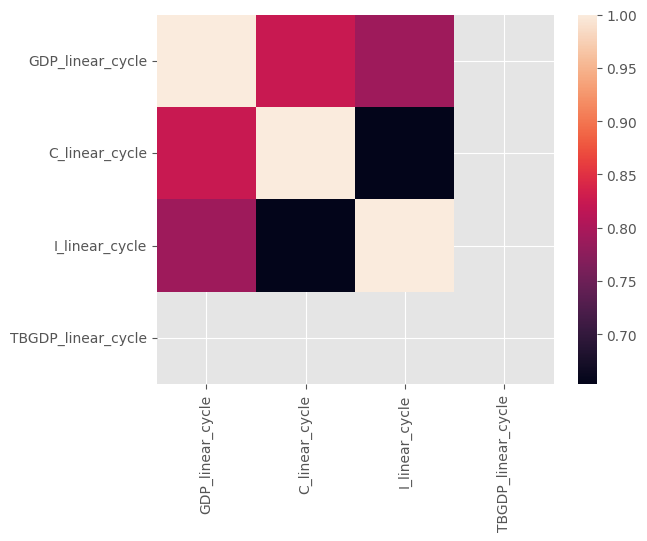

In [204]:
sns.heatmap(df[linear_cycles].corr())